# Predicting Coffee Quality

<br/>

- I am following the website [Elite Data Science](https://elitedatascience.com/machine-learning-projects-for-beginners) for this project, although I didnt totally follow this process
- The focus of this project is to just get better at the general ML workflow below
    - [Importing data](#Importing-Data)
    - [Cleaning data](#Cleaning-Data)
    - [Training and Test Sets](#Training-and-Test-Sets)
    - [Pre processing](#Pre-Processing)
    - [Transformations](#Transformations)
    - [Feature engineering](#Feature-engineering)
    
    
    
<br/>

- Useful Linkes for this projects are below
    - [Scikit](https://scikit-learn.org/stable/) __Machine Learning in Python__
    - [Python ML Tutorial](https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn)
    - [Kaggle Data Sets](https://www.kaggle.com/datasets) __Data Sets for Data Science Use__
    - [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)
    - [Data.gov](https://www.data.gov) __More Options for data__
    - [Random Forests](https://builtin.com/data-science/random-forest-algorithm)
        
    



In [26]:
## IMPORTS ##


# General imports 
import numpy as np 
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score

# family imports (families are a broad type of model)
from sklearn.ensemble import RandomForestRegressor

# cross validation tools
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# plotting imports 
import matplotlib.pyplot as plt

# used for saving sklearn model NOT RECOMENDED for keras
import joblib # for saving pickle file in a file
import pickle # dont import from sklearn.externalsn which has been depricated

# Me Navigating My Way Through the World of Data Science

<br/><br/>


<img src="photo/climbing.jpg" width = "60%">


<br/><br/>

### About Me:

I spend a lot of time climbing, playing music, and adventuring, but have started to miss my STEM roots. Machine learning application is something I feel naturally passionate about so I am doing all these projects for fun to discover if its something I want to pursue. Please leave any comments and tell me what I need to improve!! Thank you! Also feel free to go critique my github, I could use any feedback I can get.

__email:__ jamorsicato@gmail.com

__github:__ https://github.com/jamorsicato

__Linekdin:__ https://www.linkedin.com/in/jonathan-morsicato-089977196/

__instagram:__ @jonnymorsicato (if you feel like checking out some Colorado mountain adventures)


In [2]:
## Load Data For Use into pandas dataframe

df = pd.read_csv("/Users/jonnymorsicato/Desktop/Data Science/machine_learning_practice/data/arabica_data_cleaned.csv")

In [3]:
## EDA

df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [4]:
# EDA 
print("The shape of the data is (row,columns): " + str(df.shape))

The shape of the data is (row,columns): (1311, 44)


In [5]:
# EDA 

df.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1310.000000,1311.000000,1084.000000,1084.000000,1084.000000
mean,656.000763,153.887872,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,0.177099,3.591915,1759.548954,1808.843803,1784.196379
std,378.598733,129.733734,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,0.840583,5.350371,8767.847252,8767.187498,8767.016913
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,328.500000,14.500000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,656.000000,175.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,983.500000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1312.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


# EDA Conclusion

- Useful Columns: "aroma","flavor","aftertaste","acidity","body","balance","uniformity","total.cup.points"
- Total Cup Points is what I will predict 
- The remainder of the columns will be used as input
- Data Shape is __(ROW: 1311, COL: 44)__

# Cleaning Data

In [10]:
#new data frame for training use
dfc  = pd.DataFrame()

# make all column names lower case for ease of use
df.columns = map(str.lower, df.columns)

#columns I want
cols_want = {"aroma","flavor","aftertaste","acidity","body","balance","uniformity","total.cup.points"}

#make new dataframe with columns I want
for c in cols_want:
       dfc[c] = df[c]
        
dfc["tcp"] = dfc["total.cup.points"]

# make x, y for training data sets
y = dfc.tcp
x = dfc.drop("total.cup.points", axis=1)

    

In [11]:
# Double check that data frame looks like what we expected.. it does

dfc.head() 

,aroma,aftertaste,uniformity,balance,acidity,total.cup.points,flavor,body,tcp
0,8.67,8.67,10.0,8.42,8.75,90.58,8.83,8.50,90.58
1,8.75,8.50,10.0,8.42,8.58,89.92,8.67,8.42,89.92
2,8.42,8.42,10.0,8.42,8.42,89.75,8.50,8.33,89.75
3,8.17,8.42,10.0,8.25,8.42,89.00,8.58,8.50,89.00
4,8.25,8.25,10.0,8.33,8.50,88.83,8.50,8.42,88.83


## Training and Test Sets

In [12]:
# splits into random test and training sets 

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, # saves 20 percent to test
                                                    random_state=123) #arbitrary result
                                        

## Pre Processing

- Standardizarion is the usual preprocessing step
- subtract the mean from each feature and divide by std
    - Note that we will create a scalar object that contains the std, and mean. This will be used to scale the training set and the test set. The test set will not show a mean that is centered directky at 0 becuase our scalar object is made using the training set.
    
    
- many std algorithms assume: centered on zero, and the same variance
- the .StandardScaler() will create a scalar standardization object
- In practice we wont need to manually fit the scaler, instead when we make a modeling pipeline
    - __Modeling Pipeline__: transforms data using standar scalar and then fits a model using random forest regressor.
    - Pipelines help make the whole process a little faster so we can test a lot more sets 
    

In [6]:
### How to make my own scalar object, the pipeline takes care of this, but this is the process


# # scalar is an object with the mean, std for each feature in the test set

# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_train_scaled.mean(axis=0) # note that these are close enough to zero, not a concer

# # now lets scale the x_test data
# # the values will be much farther from zero because we didnt build our scalar off of this test set

# x_test_scaled = scaler.transform(x_test)

# # now lets scale the x_test data
# # the values will be much farther from zero because we didnt build our scalar off of this test set

# x_test_scaled = scaler.transform(x_test)
# x_test_scaled.mean(axis=0) # we expected these to be a little farther from 0 

In [7]:
# defining a pipeline, takes care of scalar creation(seen above) and model fit

pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

# We can also list the tunable hyper parameters like this
pipeline.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'mse',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_impurity_split': None,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforest

## Transformations

- Transformation API allows us to find a scalar fit for the preprocessing step.


## Feature engineering

- Tune hyperparameters and model parameters
    - __Model Parameters__: Can be learned directly from the model, regression coeficients 
    - __Hyperparameters__: Higher level structrural information and are set before training the model 
            - Set before training the model
            - Each decision tree in the Random Forest can decide where to branch based on the following;
            - MSE (Mean Square Error)
            - MAE (Mean Absolute Error)
            
### Cross Validation CV
    - Maxize model performance
    - reduces chance of over fitting
    - reliably estimates the performance of a method
    - Procedure for CV below
        - 1) split data into K parts (folds, typically k = 10)
        - 2) Train data with (k-1) folds
        - 3) valuate it on the remaining 1 fold
        - 4) Perform steps 2 and 3 and hold out a DIFFERENT remaining fold 
        - 5) Make performance aggregate across k-folds
       
    - Allow a process which helps refine hyperparamters 
    - GridSearchCV() performs cross validation across the entire grid of parameters
    - Note: after you tune your parameters you can boost your performance by retuning your training set
    

In [8]:
# Declare Hyperparameters 

# Should be saved in a dictionary
# Note how we save key value pairs where the value is a list.. pretty useful

hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [13]:
clf = GridSearchCV(pipeline, hyperparameters,cv=10) 
clf.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [None, 5, 3, 1],
                         'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 'log2']})

In [14]:
clf.best_params_

# Looks like the deafualt params win on this set, so CV didnt yield a lot

{'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto'}

In [15]:
clf.refit

True

## Evaluating Model Pipeline

- Usually the first model wont be the best
- If its doenst match performance standards try other models!
- Find mor data or collect more
- Find an expert to perfect these features
- If its a good model save it for later

In [16]:
y_pred = clf.predict(x_test)

print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.515111642246721
17.333173542851704


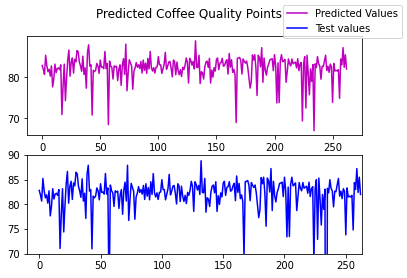

In [17]:
x = range(0,len(y_pred))

fig, axs = plt.subplots(2)
fig.suptitle('Predicted Coffee Quality Points')
axs[0].plot(x, y_pred, color = 'm', label = 'Predicted Values')
axs[1].plot(x, list(y_test), color = 'b', label = 'Test values')
axs[1].axis([-10,len(y_pred),70,90])
fig.legend(loc = 1)

In [25]:
# pikl model

# Save the model as a pickle in a file

pickleFilePath = '/Users/jonnymorsicato/Desktop/Data Science/machine_learning_practice/data/cnnBtcLibrary/data/coffeeQualityModel'
joblib.dump(clf, pickleFilePath)
  
# # Load the model from the file

# knn_from_joblib = joblib.load('filename.pkl') 

['/Users/jonnymorsicato/Desktop/Data Science/machine_learning_practice/data/cnnBtcLibrary/data/coffeeQualityModel']

### Conclusion

Using the Random Forrest regression technique it appears that the predicted "Coffee Quality Points" versus the actual was essentially in line with what I expected. There was an instant around x = 230 where a coffee got a score of near 0, which I imagine the model would not have predicted because of human error on the data set. My guess is that the coffee sommelier (barista?) just tasted the cup of coffee and had an instant reaction of hating it so they rated it 0. There is no way the random forrest model would be able to account for this. The __R2__ and __MSE__ score of the predicted model was 0.5178 and 17.23701 respectively. The MSE value of 17.23 still would not account for the outlier bad cup of coffee at x=230 in the Predicted Coffee Quality Points above, but I personally think an error of 17 points is acceptable for something as abstract as coffee quality. In the future I could try other types of classification techniques. 